In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import NonUniformImage
import matplotlib.image as img
import seaborn as sns
import cv2
import scipy.stats as ss
from scipy.misc import toi
import scipy
from scipy.stats import entropy as scipy_entropy
from PIL import Image
import itertools
from functools import reduce
%matplotlib inline
plt.style.use('seaborn')

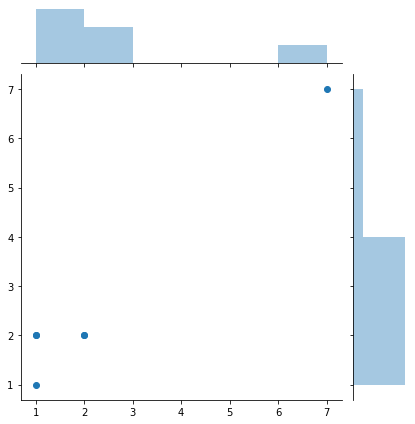

In [3]:
die = np.arange(1, 7)
die2 = np.array([1, 2, 3, 1, 5, 6,7,8,9])
coin = np.arange(1, 3)
coin2 = np.array([1,1])
sns.jointplot(mat1, mat2, kind='scatter')

In [321]:
img = Image.open("./section8-image.png")
split_img = Image.Image.split(img)
r, g, b = split_img[0], split_img[1], split_img[2]

In [331]:
def splitImage(img):
    split_img = Image.Image.split(img)
    return split_img[0], split_img[1], split_img[2]

def shannon_entropy(image, base=2):
    _, counts = np.unique(image, return_counts=True)
    return scipy_entropy(counts, base=base)

def cropImage(img):
    r, g, b = splitImage(img)
    w, h = img.size
    top = r.crop((20, 0, w-20, h))
    return top, [g.crop((40-x, 0, w-x, h)) for x in range(40, -1, -1)]

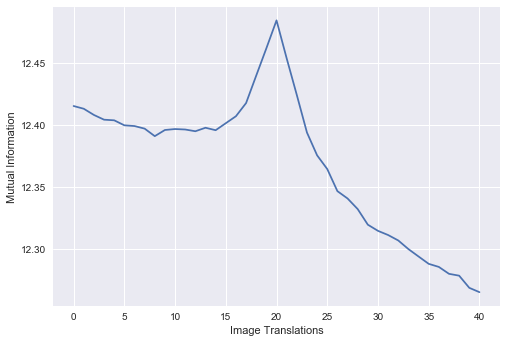

In [348]:
img = Image.open("./section8-image.png")
top, bottoms = cropImage(img)
mis = []
for i in range(len(bottoms)):
    hist = np.histogram2d(np.asarray(top).flatten(), np.asarray(bottoms[i]).flatten(), bins=256)
    hist_img = Image.fromarray(hist[0], 'RGB')
    mis.append(shannon_entropy(top) + shannon_entropy(bottoms[i]) - shannon_entropy(hist_img))

fig = plt.figure()
plt.ylabel('Mutual Information')
plt.xlabel('Image Translations')
sns.lineplot(x=[x for x in range(41)], y=mis)

In [ ]:
hist = np.histogram2d(np.asarray(r).flatten(), np.asarray(g).flatten(), bins=256)
img = Image.fromarray(hist[0], 'RGB')
test = shannon_entropy(r) + shannon_entropy(g) - shannon_entropy(img)

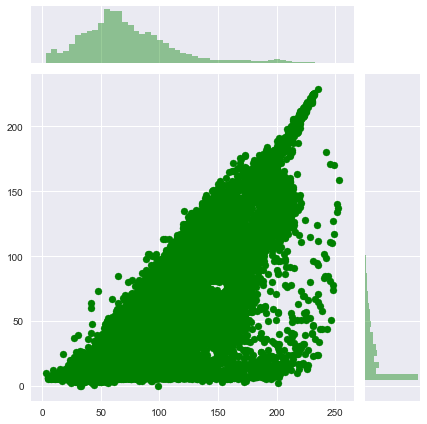

In [79]:
sns.jointplot(x=g, y=r, kind='scatter', color='green')

In [8]:
def jointTable(x, y):
    ones = np.ones((len(x)+1, len(y)+1))
    unique, counts = np.unique(x, return_counts=True)
    xdic = dict(zip(unique, counts))
    unique, counts = np.unique(y, return_counts=True)
    ydic = dict(zip(unique, counts))
    
    for i in range(len(x)+1):
        for j in range(len(y)+1):
            if (i+1 in xdic.keys() and j+1 in ydic.keys()):
                ones[j][i] = (xdic[i+1]/len(x)) * (ydic[i+1]/len(y))
            else:
                ones[j][i] = 0
    df = pd.DataFrame(ones)
    df['Marginal'] = df.sum(axis=1)
    df = df.T
    df['Marginal'] = df.sum(axis=1)
    df = df.T
    return df
df = jointTable([1,1,2,3,4,5,7,7], [1,1,2,3,4,5,7,1])

In [250]:
def entropy(signal):
    len_sig = signal.size
    sym_set = list(set(signal))
    num_sym = len(sym_set)
    prob = [np.size(signal[signal==i])/(1.0*len_sig) for i in sym_set]
    ent = np.sum([p * np.log2(1.0/p) for p in prob])
    return ent

def getEntropy(binsize, img):
    N = binsize
    S = g.shape
    E = np.array(img)
    for row in range(S[0]):
        for col in range(S[1]):
            Lx=np.max([0,col-N])
            Ux=np.min([S[1],col+N])
            Ly=np.max([0,row-N])
            Uy=np.min([S[0],row+N])
            region=g[Ly:Uy,Lx:Ux].flatten()
            E[row,col]=entropy(region)
    return E

In [177]:
green = getEntropy(5, g)

KeyboardInterrupt: 

In [ ]:
red = getEntropy(5, r)

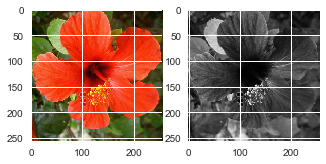

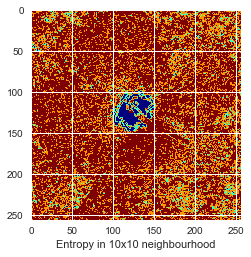

In [183]:
plt.subplot(1,3,1)
plt.imshow(img)

plt.subplot(1,3,2)
plt.imshow(g, cmap=plt.cm.gray)

fig = plt.figure(figsize=(10, 10))
plt.subplot(1,3,3)
plt.imshow(rip, cmap=plt.cm.jet)
plt.xlabel('Entropy in 10x10 neighbourhood')
plt.tight_layout()
plt.show()

In [303]:
hist = np.histogram2d(np.asarray(r).flatten(), np.asarray(g).flatten(), bins=256)

(256, 256)

In [167]:
green = getEntropy(5, g)
red = getEntropy(5, r)

In [182]:
rip = getEntropy(1, hist[0])

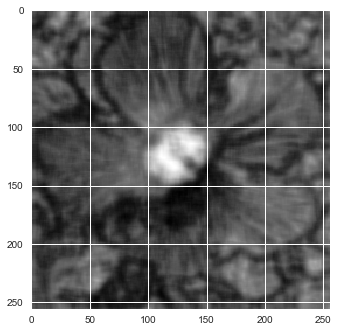

In [178]:
plt.imshow(rip)

In [170]:
x = (red + green) - rip

In [190]:
red.flatten().sum() + green.flatten().sum() - rip.flatten().sum()

457574.3452636488

In [191]:
rip.flatten().sum()

115023.65473635119

In [192]:
green.flatten().sum()

286299

In [193]:
red.flatten().sum()

286299

In [194]:
def entropy(*X):
    return np.sum(-p * np.log2(p) if p > 0 else 0 for p in
        (np.mean(reduce(np.logical_and, (predictions == c for predictions, c in zip(X, classes))))
            for classes in itertools.product(*[set(x) for x in X])))

In [198]:
def entropy(X):
    probs = [np.mean(X == c) for c in set(X)]
    return np.sum(-p * np.log2(p) for p in probs)

In [232]:
for i in range(1, 20):
    x = entropy(np.histogram(r.flatten(), bins=int(256/i))[0])
    y = entropy(np.histogram(g.flatten(), bins=int(256/i))[0])
    z = entropy(np.histogram2d(r.flatten(), g.flatten(), bins=int(256/i))[0].flatten())
    print(i, x+y-z)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until


1 12.504972206207468
2 11.378406661851288
3 10.046355993021404
4 8.961184741035584
5 7.962732543888057
6 7.098781775683815
7 6.546213025077075
8 6.048311456552395
9 5.518709300967416
10 4.975304155096608
11 4.707053451365707
12 4.404482484899469
13 4.029734146679781
14 3.872968462082304
15 3.607163303480375
16 3.4315514054097225
17 3.277082734927914
18 2.9766320845271874
19 2.794757928182916


In [238]:
np.histogram(r.flatten(), bins=256)

(array([    3,     1,     5,    14,    37,   318, 16485,  1212,   756,
            0,   754,  1004,  1342,  1075,   894,   904,  1135,  1129,
            0,  1003,   947,   964,   884,   857,   892,   883,   943,
          860,     0,   811,   926,   786,   776,   843,   851,   760,
          744,     0,   700,   751,   750,   628,   664,   594,   629,
          602,   553,     0,   522,   522,   479,   511,   534,   493,
          488,   458,     0,   463,   435,   435,   439,   438,   396,
          382,   331,   331,     0,   311,   319,   290,   307,   293,
          268,   259,   242,     0,   263,   246,   239,   223,   220,
          200,   178,   208,   176,     0,   170,   184,   146,   150,
          158,   142,   152,   144,     0,   143,   140,   143,   127,
          139,   128,   113,   115,   124,     0,    98,    96,   103,
           73,    77,    77,    77,    62,     0,    59,    64,    54,
           51,    69,    54,    58,    45,    64,     0,    61,    58,
      

In [240]:
x = entropy(np.histogram(r.flatten(), bins=int(256/i))[0])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [255]:
from scipy.stats import entropy as ent

In [257]:
ent(r, base=10)

array([2.23393122, 2.23946937, 2.2300305 , 2.23062716, 2.23693867,
       2.23128584, 2.23197661, 2.21822447, 2.21827032, 2.23425075,
       2.23033904, 2.24651523, 2.24816068, 2.25636486, 2.27001634,
       2.27281196, 2.27430685, 2.27200062, 2.26478125, 2.26459136,
       2.26826704, 2.27431186, 2.28389503, 2.28032478, 2.29004024,
       2.28877149, 2.29016587, 2.29176733, 2.28886276, 2.29143345,
       2.30160761, 2.31817911, 2.32754749, 2.32984924, 2.3257441 ,
       2.31384434, 2.30851026, 2.30940198, 2.30761139, 2.30766082,
       2.31046472, 2.29926657, 2.29461663, 2.28983468, 2.27668397,
       2.26218198, 2.24569539, 2.23949391, 2.2326457 , 2.23263502,
       2.23503174, 2.23303221, 2.22512957, 2.22221583, 2.22010466,
       2.22089288, 2.21457703, 2.20783317, 2.2010253 , 2.20348279,
       2.21007967, 2.21767743, 2.23292222, 2.2350561 , 2.22471472,
       2.21631436, 2.20886402, 2.20516813, 2.2055305 , 2.22091561,
       2.24483577, 2.25208699, 2.26121948, 2.2528372 , 2.23458

In [258]:
getEntropy(r, 2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()